In [196]:
import xarray as xr
import seaborn as sns
import cmocean
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinedBackend.figure_format = 'retina'

# Load the datasets for both sea surface temperature and sea ice concentration
### Both of the datasets are provided by NOAA.

In [197]:
! wget https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/noaa.ersst.v5/sst.mnmean.nc
! gunzip sst.mnmean.nc
sst_data = xr.open_dataset('sst.mnmean.nc')
sst_data

--2019-12-04 01:19:53--  https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/noaa.ersst.v5/sst.mnmean.nc
Resolving www.esrl.noaa.gov (www.esrl.noaa.gov)... 140.172.253.69, 2610:20:8800:6001::45
Connecting to www.esrl.noaa.gov (www.esrl.noaa.gov)|140.172.253.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60718854 (58M) [application/x-netcdf]
Saving to: ‘sst.mnmean.nc’

sst.mnmean.nc       100%[===================>]  57.91M  40.5MB/s    in 1.4s    

2019-12-04 01:19:55 (40.5 MB/s) - ‘sst.mnmean.nc’ saved [60718854/60718854]

gzip: sst.mnmean.nc: unknown suffix -- ignored


<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 455)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2019-10-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    dataset_title:  NOAA Optimum Interpolation (OI) SST V

In [198]:
! wget https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/noaa.oisst.v2/icec.mnmean.nc
! gunzip icec.mnmean.nc
icec_data = xr.open_dataset('icec.mnmean.nc')
icec_data

--2019-12-04 01:19:57--  https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/noaa.oisst.v2/icec.mnmean.nc
Resolving www.esrl.noaa.gov (www.esrl.noaa.gov)... 140.172.253.69, 2610:20:8800:6001::45
Connecting to www.esrl.noaa.gov (www.esrl.noaa.gov)|140.172.253.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58983704 (56M) [application/x-netcdf]
Saving to: ‘icec.mnmean.nc’

icec.mnmean.nc      100%[===================>]  56.25M  18.7MB/s    in 3.0s    

2019-12-04 01:20:00 (18.7 MB/s) - ‘icec.mnmean.nc’ saved [58983704/58983704]

gzip: icec.mnmean.nc: unknown suffix -- ignored


<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 455)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2019-10-01
Dimensions without coordinates: nbnds
Data variables:
    icec       (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:51:42 2005: ncks -d time,0,278 SAVEs/icec.m...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    NCO:            4.0.0
    dataset_title:  NOAA Optimu

# 1. Anomalies for SST and ICEC from 1982 to 2019

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


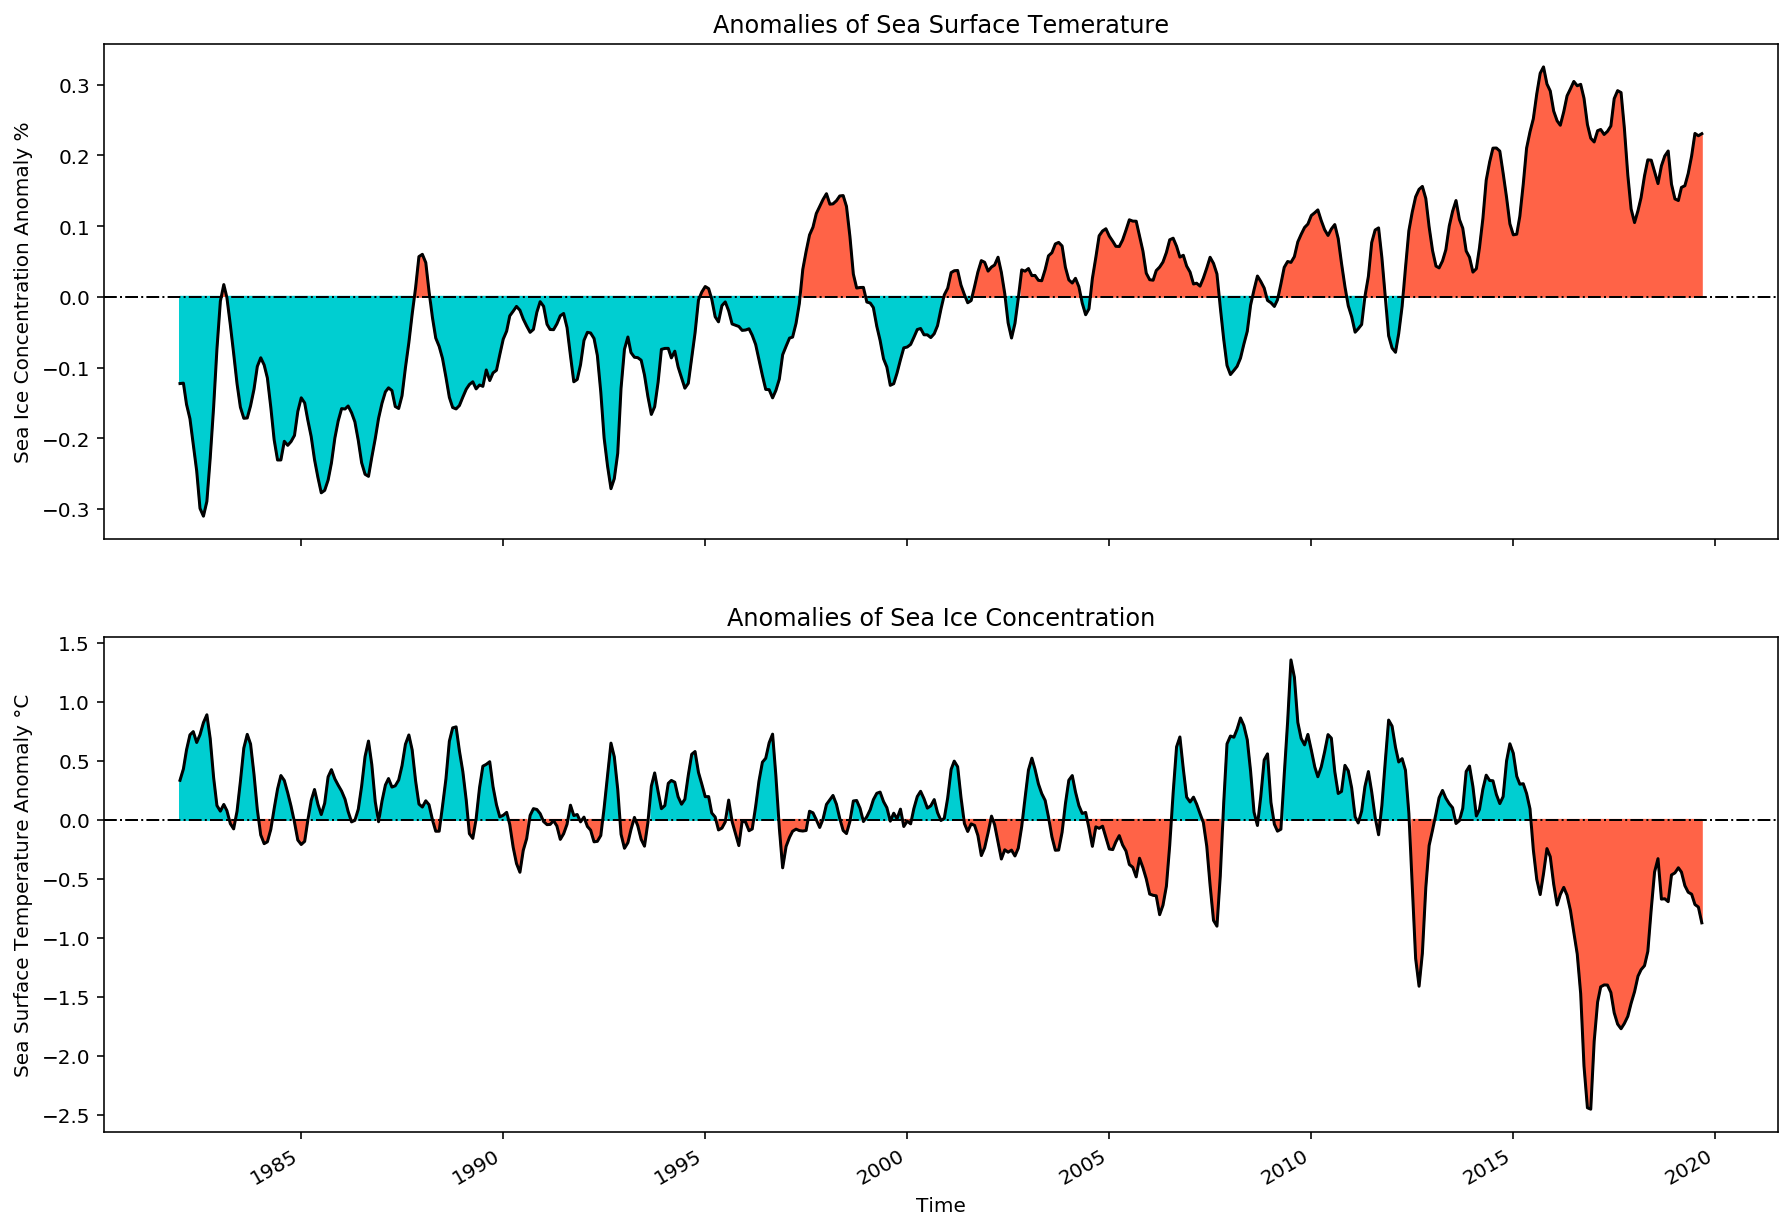

In [199]:
fig,ax = plt.subplots(figsize=(15,10), nrows=2)

gb_sst = sst_data.groupby('time.month')
sst_anom = gb_sst - gb_sst.mean(dim='time')
sst_rolling = sst_anom.rolling(time=3, center=True).mean()
sst_mean = sst_rolling.sst.mean(dim=('lat','lon'))
sst_mean.plot(ax=ax[0], c='K')
ax[0].axhline(y=0, c='K', linewidth=1, linestyle='dashdot')
ax[0].set_title('Anomalies of Sea Surface Temerature')
ax[0].set_ylabel('Sea Ice Concentration Anomaly %')
ax[0].label_outer()
date_sst = sst_mean.time.values
ax[0].fill_between(date_sst, sst_mean.where(sst_mean>0), 0, color='tomato')
ax[0].fill_between(date_sst, sst_mean.where(sst_mean<0), 0, color='darkturquoise')

gb_icec = icec_data.groupby('time.month') 
icec_anom = gb_icec - gb_icec.mean(dim='time')
icec_rolling = icec_anom.rolling(time=3, center=True).mean()
icec_mean = icec_rolling.icec.mean(dim=('lat','lon'))
icec_mean.plot(ax=ax[1], c='K')
ax[1].axhline(y=0, c='K', linewidth=1, linestyle='dashdot')
ax[1].set_title('Anomalies of Sea Ice Concentration')
ax[1].set_ylabel('Sea Surface Temperature Anomaly °C')
date_icec = icec_mean.time.values
ax[1].fill_between(date_icec, icec_mean.where(icec_mean<0), 0, color='tomato')
ax[1].fill_between(date_icec, icec_mean.where(icec_mean>0), 0, color='darkturquoise')

### Based on the line plots above, we can indentify that the anomalies of sea surface temperature and sea ice concentration are roughly matched. From 1982 to 2019, sea surface temperature was increasing, while sea ice concentration was decreasing.

# 2. Comparison globally (1982 and 2019)

## 2.1 Comparison of global SST (1982 and 2019)

Text(0, 0.5, 'Longitude')

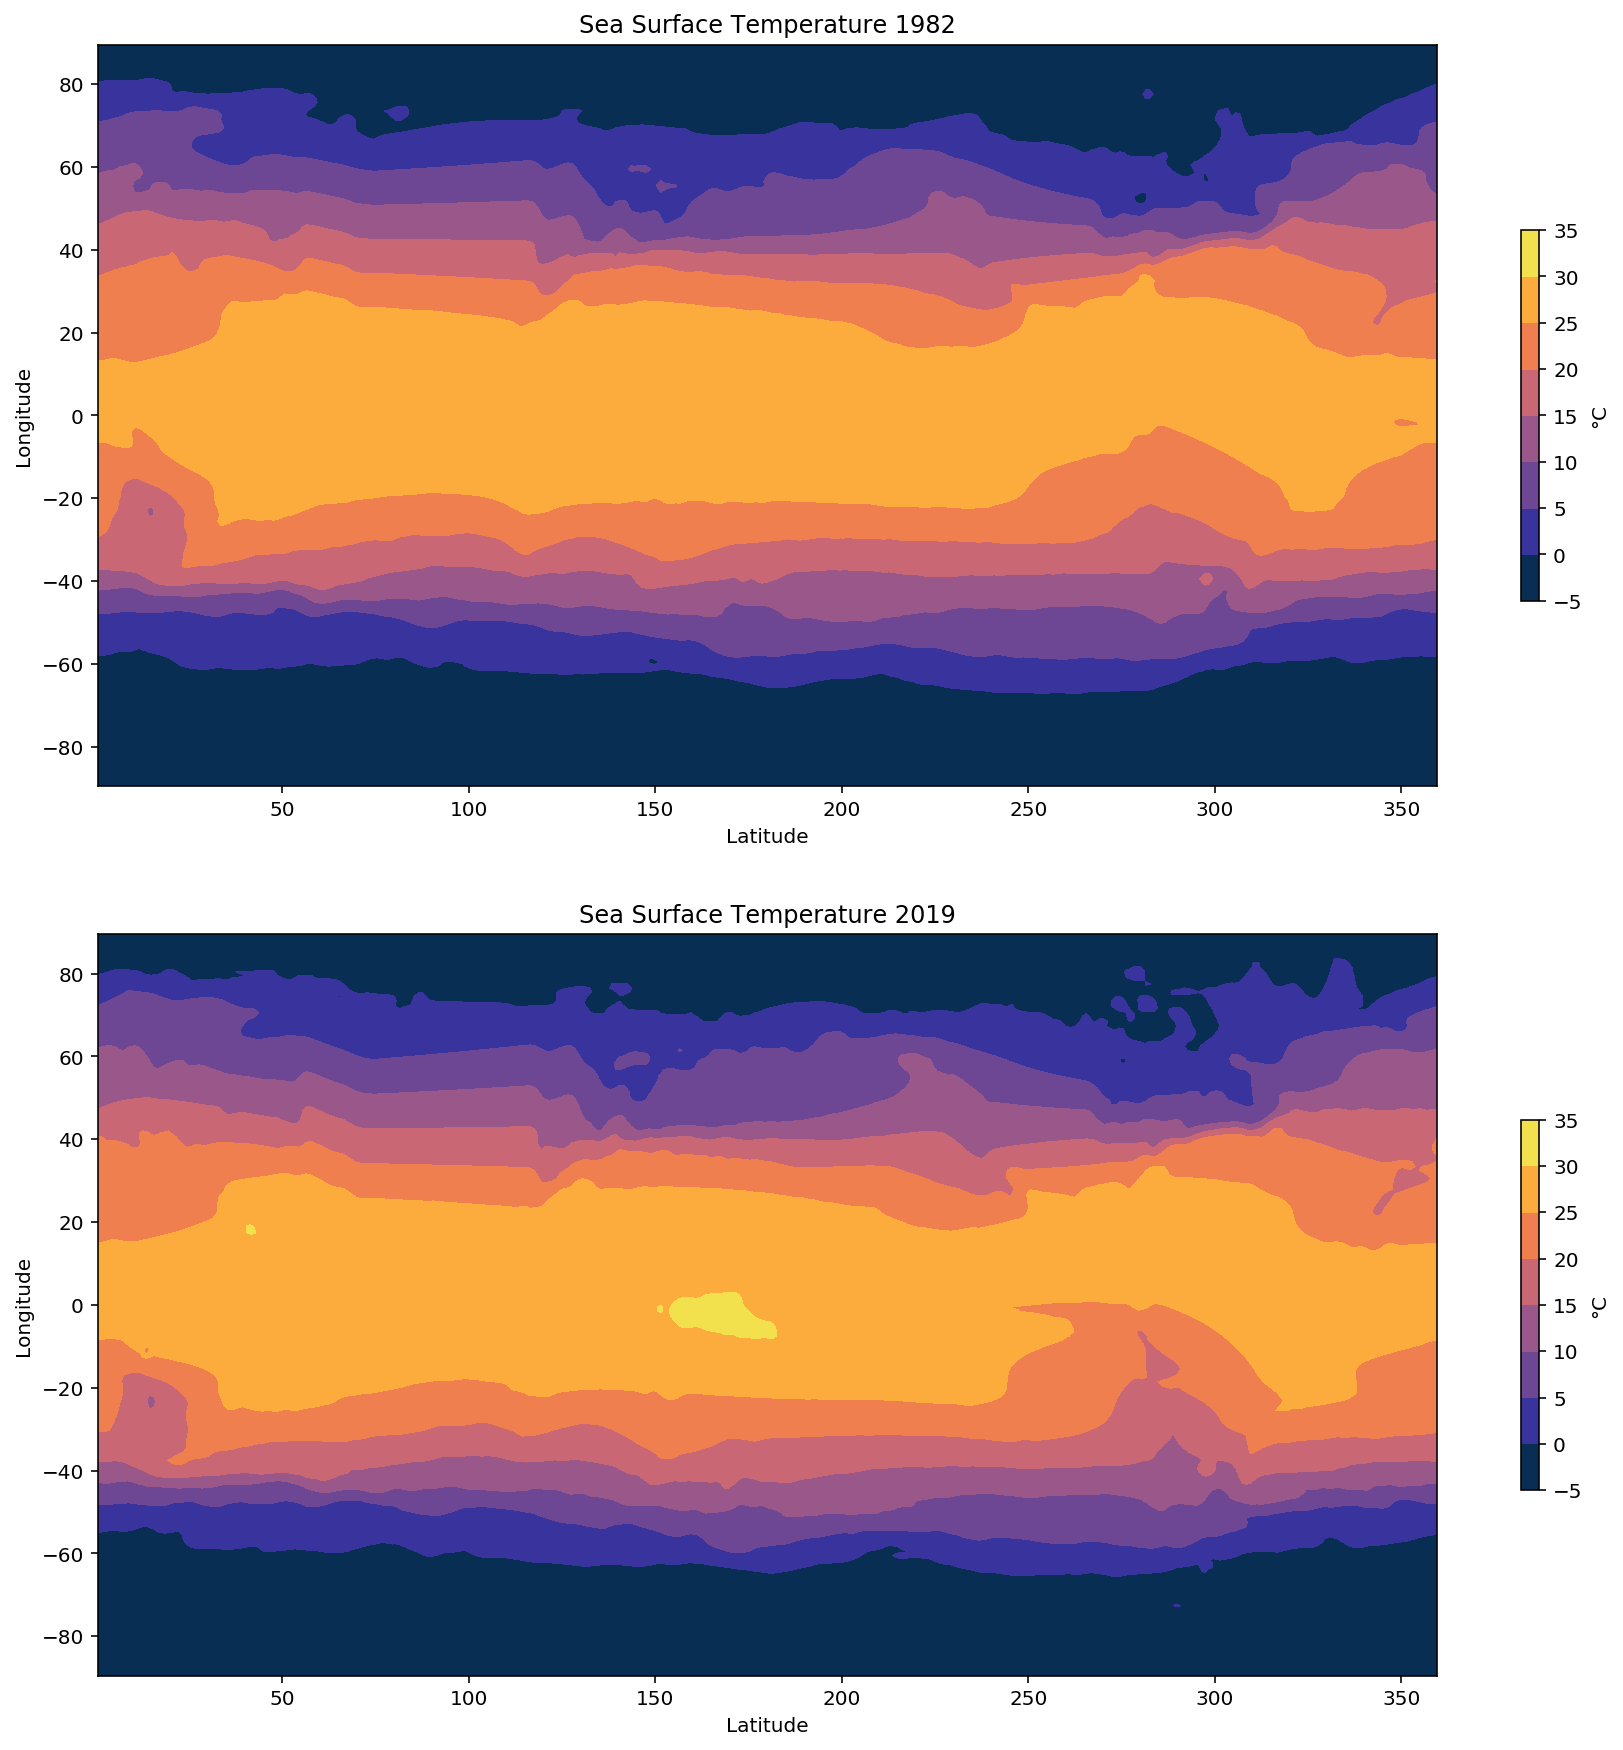

In [200]:
fig,ax = plt.subplots(figsize=(15,15), nrows=2)

sst_1982 = sst_data.sel(time=slice('1982-07-01','1983-07-01'))
sst_1982_mean = sst_1982.sst.mean(dim='time')
sstlevel = np.arange(-5, 40, 5)
globmap_sst_1982 = ax[0].contourf(sst_1982_mean.lon, sst_1982_mean.lat, sst_1982_mean,
                                  sstlevel,
                                  cmap=cmocean.cm.thermal,
                                  extent='both')
cbglob_sst_1982 = fig.colorbar(globmap_sst_1982, shrink=0.5, ax=ax[0])
cbglob_sst_1982.set_label('°C')
ax[0].set_title('Sea Surface Temperature 1982')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

sst_2019 = sst_data.sel(time=slice('2018-07-01','2019-07-01'))
sst_2019_mean = sst_2019.sst.mean(dim='time')
globmap_sst_2019 = ax[1].contourf(sst_2019_mean.lon, sst_2019_mean.lat, sst_2019_mean,
                                  sstlevel,
                                  cmap=cmocean.cm.thermal,
                                  extent='both')
cbglob_sst_2019 = fig.colorbar(globmap_sst_2019, shrink=0.5, ax=ax[1])
cbglob_sst_2019.set_label('°C')
ax[1].set_title('Sea Surface Temperature 2019')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

### From the plots, we can roughly see the sea surface temperature became higher in 2019 than in 1982, especially in the areas near equator and poles. I also found a problem of this sst dataset: the continental area also have data for sea surface temperature, where should be filled with Nah value.

## 2.2 Comparison of global ICEC (1982 and 2019)

Text(0, 0.5, 'Longitude')

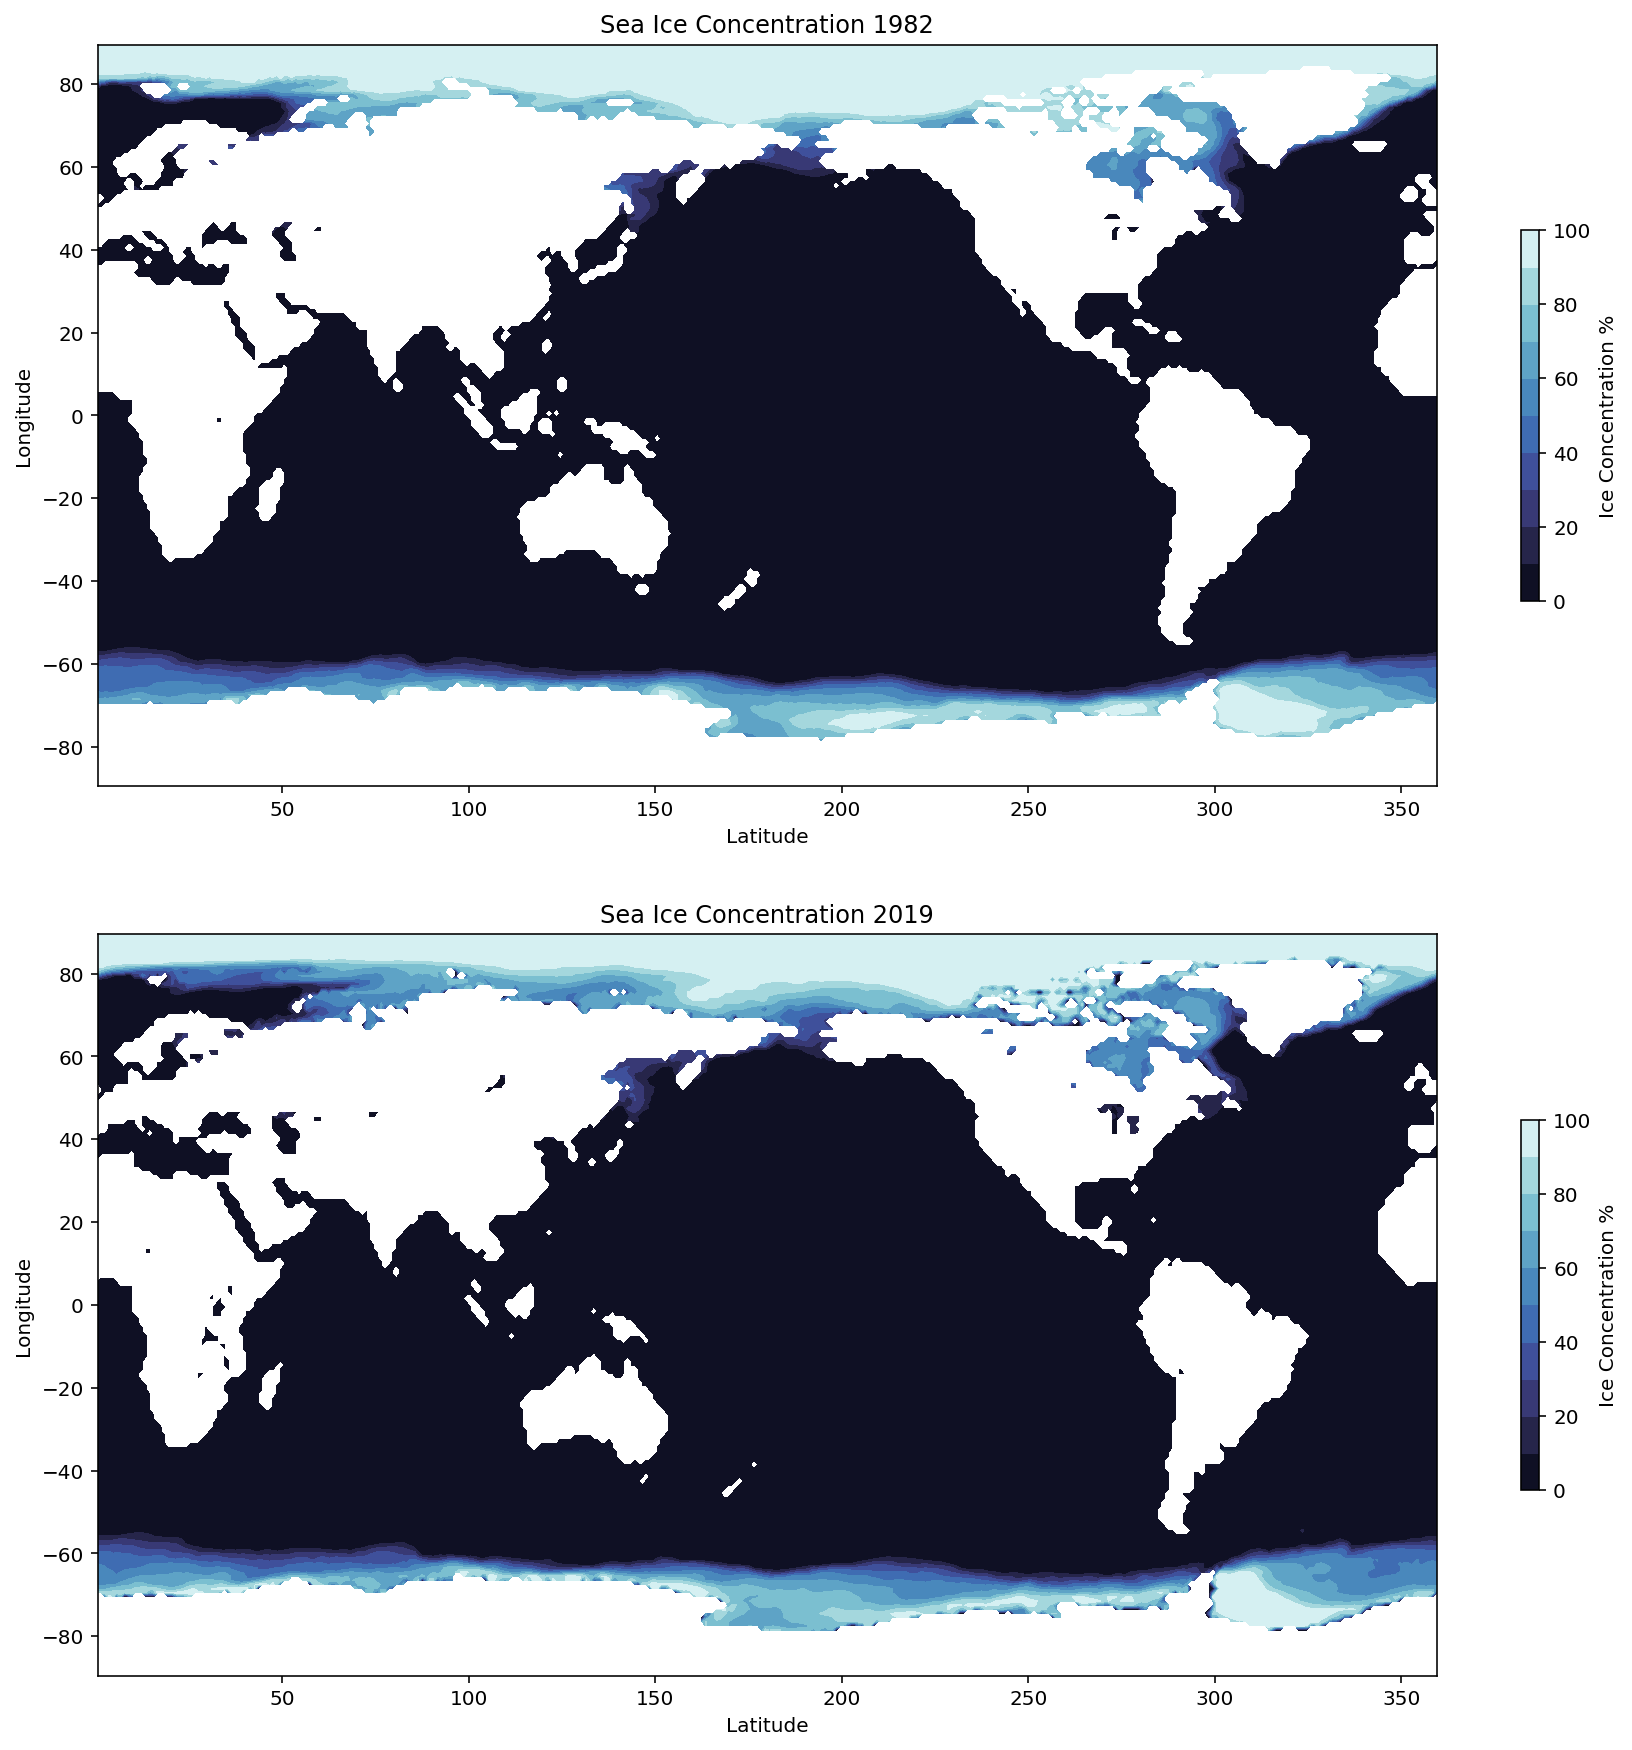

In [201]:
fig,ax = plt.subplots(figsize=(15,15), nrows=2)

icec_1982 = icec_data.sel(time=slice('1982-07-01','1983-07-01'))
icec_1982_mean = icec_1982.icec.mean(dim='time')
iceclevel = np.arange(0, 110, 10)
globmap_icec_1982 = ax[0].contourf(icec_1982_mean.lon, icec_1982_mean.lat, icec_1982_mean,
                                   iceclevel,
                                   cmap=cmocean.cm.ice,
                                   extent='both',
                                   vmin=0, vmax=100)
cbglob_icec_1982 = fig.colorbar(globmap_icec_1982, shrink=0.5, ax=ax[0])
cbglob_icec_1982.set_label('Ice Concentration %')
ax[0].set_title('Sea Ice Concentration 1982')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

icec_2019 = icec_data.sel(time=slice('2018-07-01','2019-07-01'))
icec_2019_mean = icec_2019.icec.mean(dim='time')
globmap_icec_2019 = ax[1].contourf(icec_2019_mean.lon, icec_2019_mean.lat, icec_2019_mean,
                                   iceclevel,
                                   cmap=cmocean.cm.ice,
                                   extent='both',
                                   vmin=0, vmax=100)
cbglob_icec_2019 = fig.colorbar(globmap_icec_2019, shrink=0.5, ax=ax[1])
cbglob_icec_2019.set_label('Ice Concentration %')
ax[1].set_title('Sea Ice Concentration 2019')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

### From the plots above, we can roughly indentify that the sea ice concentration in 2019 became lower in 1982, especially near polar areas, as the light blue areas became less. This is reverse to the change of the sea ice concentration before.

# 3. Further comparison in Arctic area (1982 and 2019)
### From the global plots above, they are probably hard to demostrate the difference. Therefore, more detailed plots focused in a typical area might be needed. Since Arctic area mainly contains ocean but not lands, it might be a better place to research the correlation of sea surface temperature and sea ice concentration.

## 3.1 Further comparison of SST in Arctic Area (1982 and 2019)

Text(0.5, 1.0, 'Sea Surface Temperature 2019')

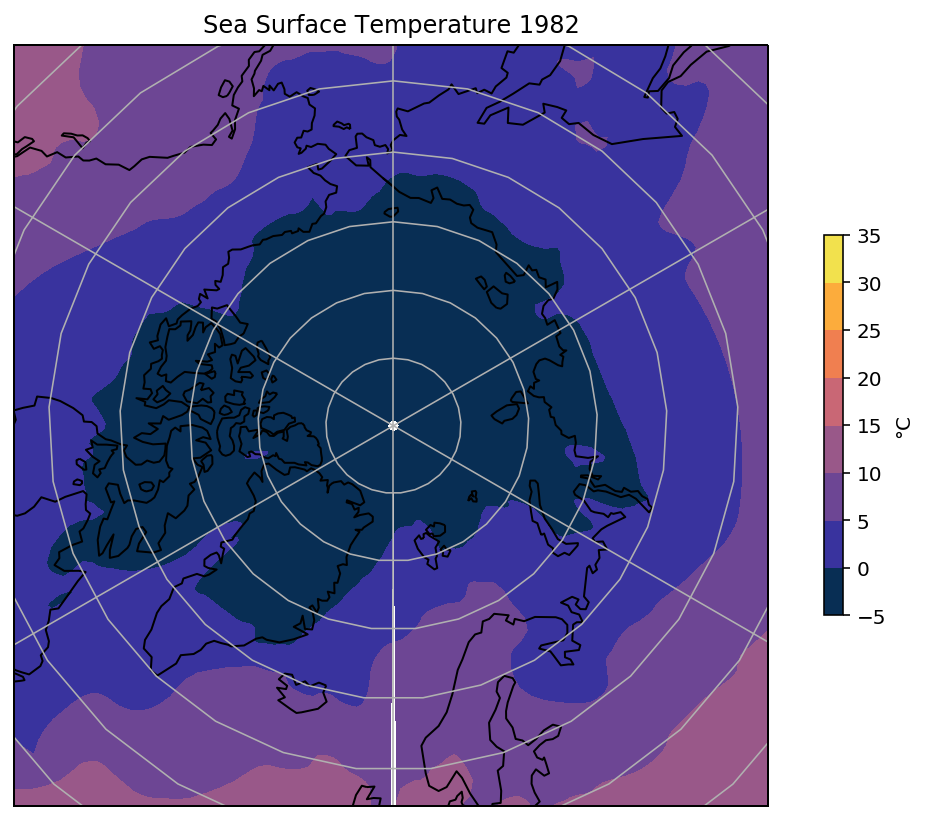

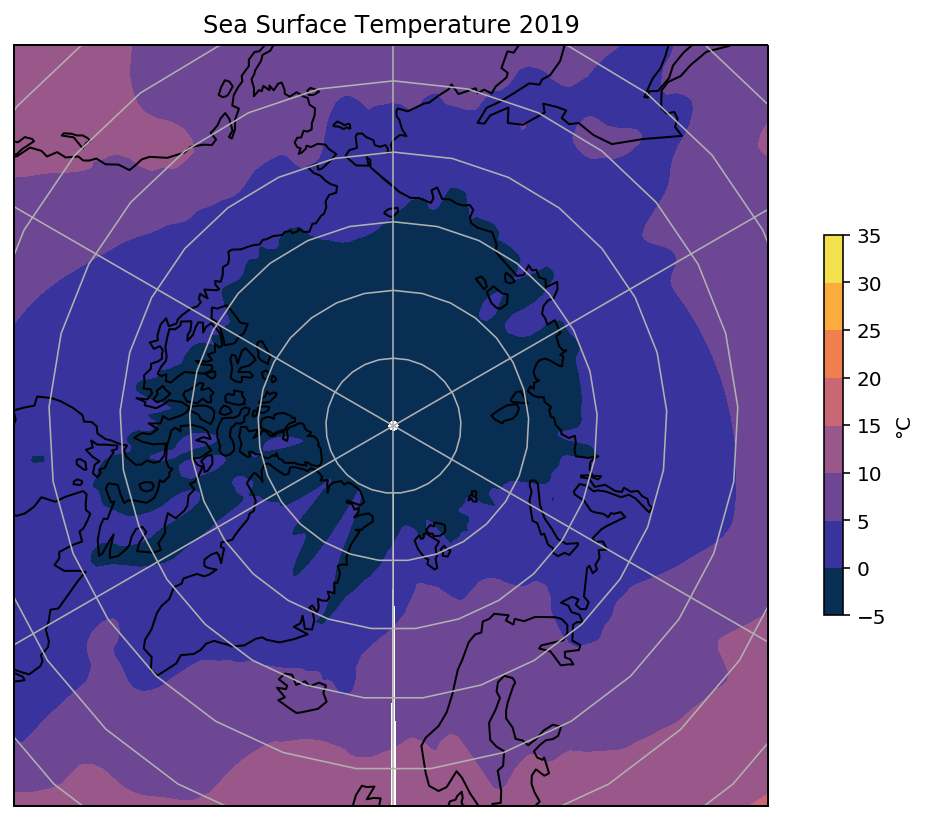

In [202]:
fig_sst_1982 = plt.figure(figsize=(10,7))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
sstmap_1982 = ax.contourf(sst_1982_mean.lon, sst_1982_mean.lat, sst_1982_mean,
                          sstlevel,
                          cmap=cmocean.cm.thermal, 
                          extent='both',
                          transform=ccrs.PlateCarree())
cb_sst_1982 = fig_sst_1982.colorbar(sstmap_1982, shrink=0.5)
cb_sst_1982.set_label('°C')
ax.set_title('Sea Surface Temperature 1982')

fig_sst_2019 = plt.figure(figsize=(10,7))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
sstmap_2019 = ax.contourf(sst_2019_mean.lon, sst_2019_mean.lat, sst_2019_mean,
                          sstlevel,
                          cmap=cmocean.cm.thermal,
                          extent='both',
                          transform=ccrs.PlateCarree())
cb_sst_2019 = fig_sst_2019.colorbar(sstmap_2019, shrink=0.5)
cb_sst_2019.set_label('°C')
ax.set_title('Sea Surface Temperature 2019')

### From the plots above, they more clearly demostrate an increase of the sea surface temperature, as the dark blue area significantly decrease.

## 3.2 Further comparison of ICEC in Arctic area (1982 and 2019)

Text(0.5, 1.0, 'Sea Ice in Arctic Area 2019')

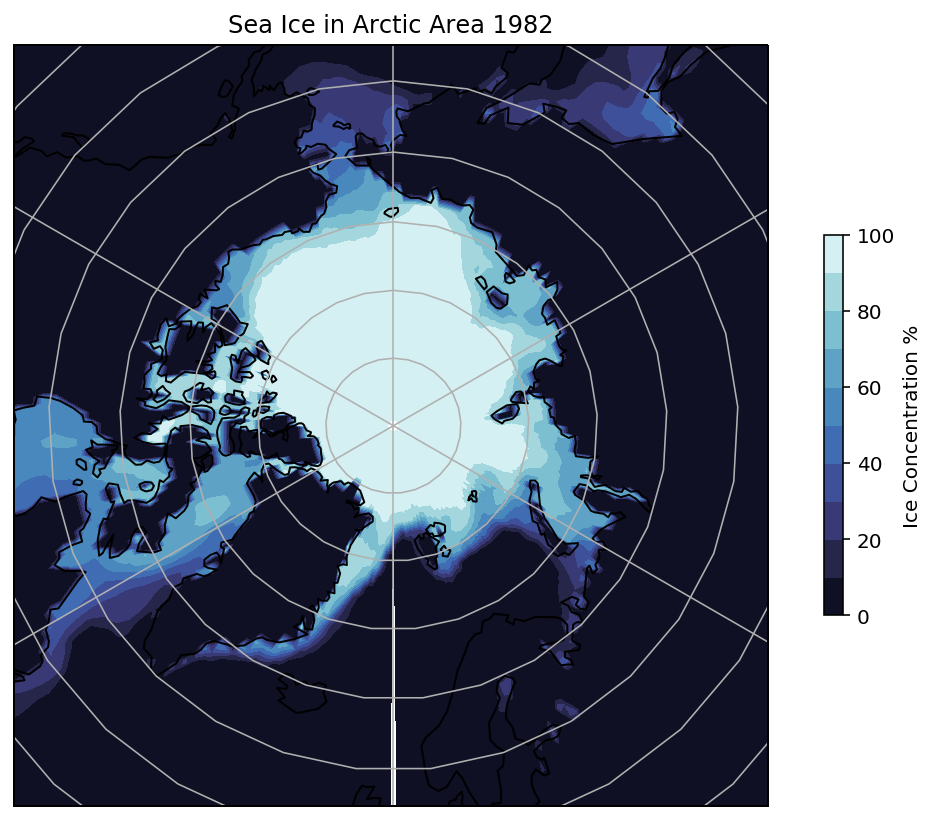

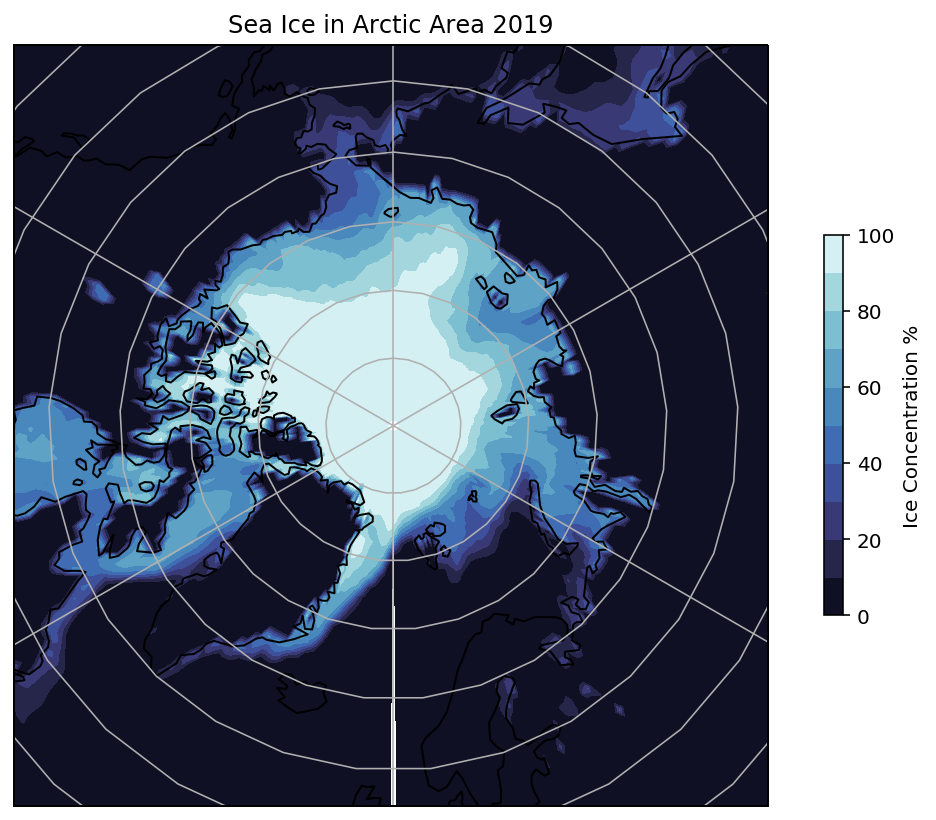

In [203]:
fig_icec_1982 = plt.figure(figsize=(10,7))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
icec_1982_where = icec_1982_mean.where(icec_1982_mean>0, 0)
icemap_1982 = ax.contourf(icec_1982_where.lon, icec_1982_where.lat, icec_1982_where,
                          iceclevel,
                          cmap=cmocean.cm.ice, 
                          extent='both', 
                          transform=ccrs.PlateCarree())
cb_icec_1982 = fig_icec_1982.colorbar(icemap_1982, shrink=0.5)
cb_icec_1982.set_label('Ice Concentration %')
ax.set_title('Sea Ice in Arctic Area 1982')

fig_icec_2019 = plt.figure(figsize=(10,7))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
icec_2019_where = icec_2019_mean.where(icec_2019_mean>0, 0)
icemap_2019 = ax.contourf(icec_2019_where.lon, icec_2019_where.lat, icec_2019_where,
                          iceclevel,
                          cmap=cmocean.cm.ice,
                          extent='both',
                          transform=ccrs.PlateCarree())
cb_icec_2019 = fig_icec_2019.colorbar(icemap_2019, shrink=0.5)
cb_icec_2019.set_label('Ice Concentration %')
ax.set_title('Sea Ice in Arctic Area 2019')

### From the figure above, there are an obvious decrease of the light blue area from 1982 to 2019, which is reverse as the figures above for sea surface temperature, meaning a significant decrease for sea ice concentration in the arctic are.

# 4. Correlation between SST and ICEC
### From both of the global maps and local maps above, we observe a lower sea surface temperature and larger sea ice concentration in 1982 than 2019, so the result might represent that there is negative correlation between sea surface temperature and sea ice concentration. To verify the hypothesis, the scatter plot below direcly shows the correlation between sea surface temperature anomalies and sea ice concentration anomalies.

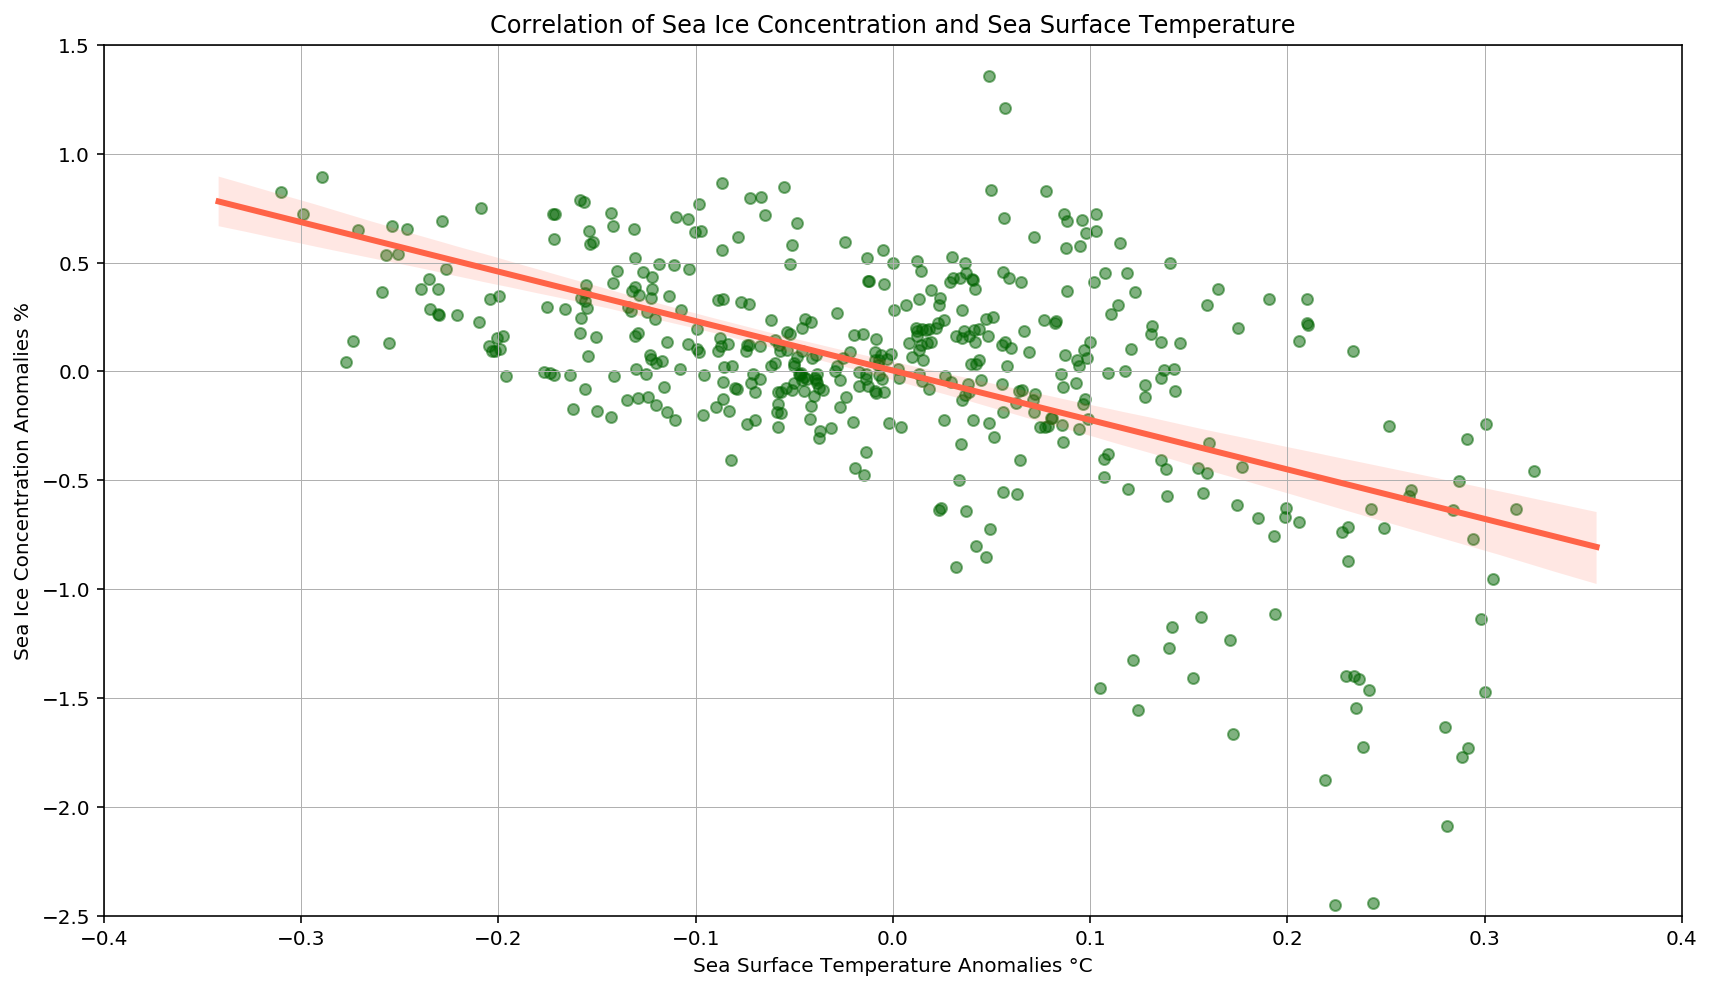

In [204]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.regplot(sst_mean, icec_mean, data=icec_mean, fit_reg=True,
            scatter_kws={"s": 30, "alpha": 0.5, "color": "darkgreen"},
            line_kws={"linewidth": 3, "color": "tomato"}) 
ax.grid(linewidth=0.5)
ax.set_ylabel('Sea Ice Concentration Anomalies %')
ax.set_xlabel('Sea Surface Temperature Anomalies °C')
ax.set_title('Correlation of Sea Ice Concentration and Sea Surface Temperature')
plt.ylim(-2.5, 1.5)
plt.xlim(-0.4, 0.4)
plt.tight_layout()

### Based on the trendline (regression) on the scatter plot, sea ice contration decreases as sea surface temperature increases. Therefore, we can conclude a negative correlation between sea surface temperature and sea ice concentration.